# 오디오 처리(Audio Processing)


## Audio
- audio는 어떤 물체가 진동하면서 발생.
> 예) 목소리의 경우 공기 분자가 진동을 하면서 발생.
- 공기압의 진폭이, waveform 형태를 띄게 되어 우리가 흔히 보는 그래프로 표현.

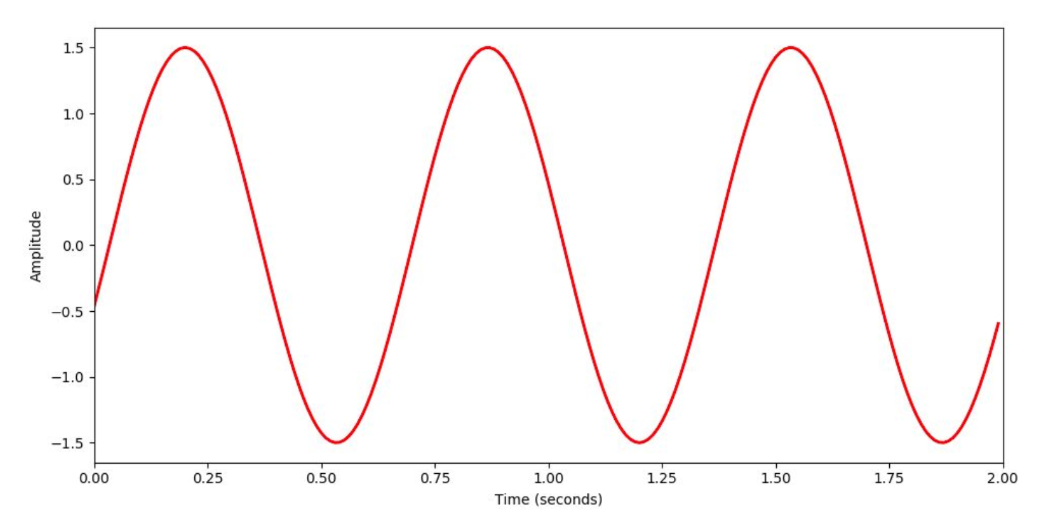
- Y축은 Amplitude(진폭): 진동의 중심에서 최대까지의 거리 $A$로 표현
- X축은 Time(sec): 파동이 진행되는 시간.

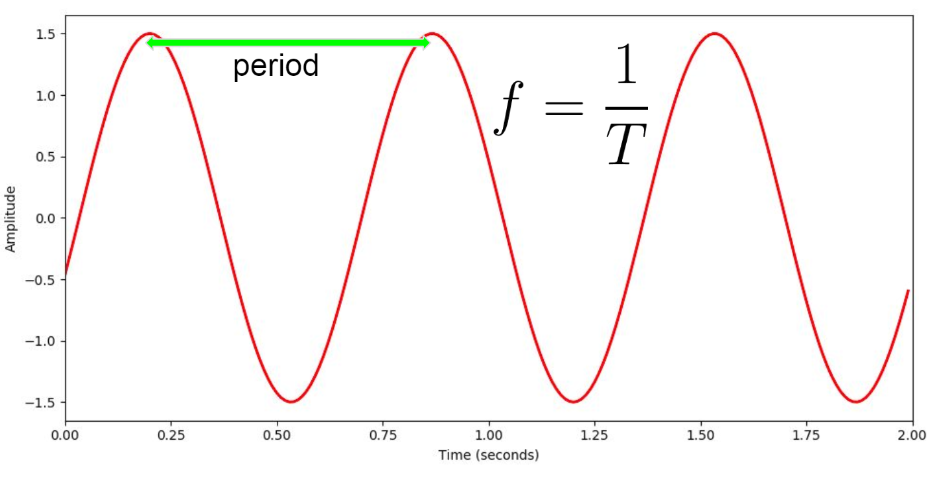
- period(주기): 특정 지점에서 다음 등장하는 그 값까지
- Frequency는 Hz 단위를 사용하며, 1초에 100번 period(주기)가 발생하는, 즉 100번 진동하는 소리를 100Hz로 정의한다. 그래서 $f = 1/T$ 라는 수식이 성립
    - 주기와 진동수는 서로 역수인 관계($f=1/T$ 또는 $T=1/f)
    - 주기가 길수록 진동수는 작고 주기가 짧을 수록 진동수는 큰 관계
- 사람의 가청 Frequency는 약 20Hz ~ 20KHz

### 파형의 수학적 표현
$$y(t)=Asin(2πft+ϕ)$$
- $A$: 진폭(amplitude)
- $sin$: 사인함수
- $f$: 진동수(frequency)
- $t$: 시간(time)
- ϕ: 위상(phase). 위상이란 진동체의 상대적인 위치변화를 나타내는 부분. 위상값에 따라 파형이 왼쪽으로 또는 오른쪽으로 이동(shift)된 형상인지를 알 수 있다.
    - 위상: 반복되는 파형의 한 주기에서 첫 시작점의 각도 혹은 어느 한 순간의 위치

### 진폭, 진동수의 관계
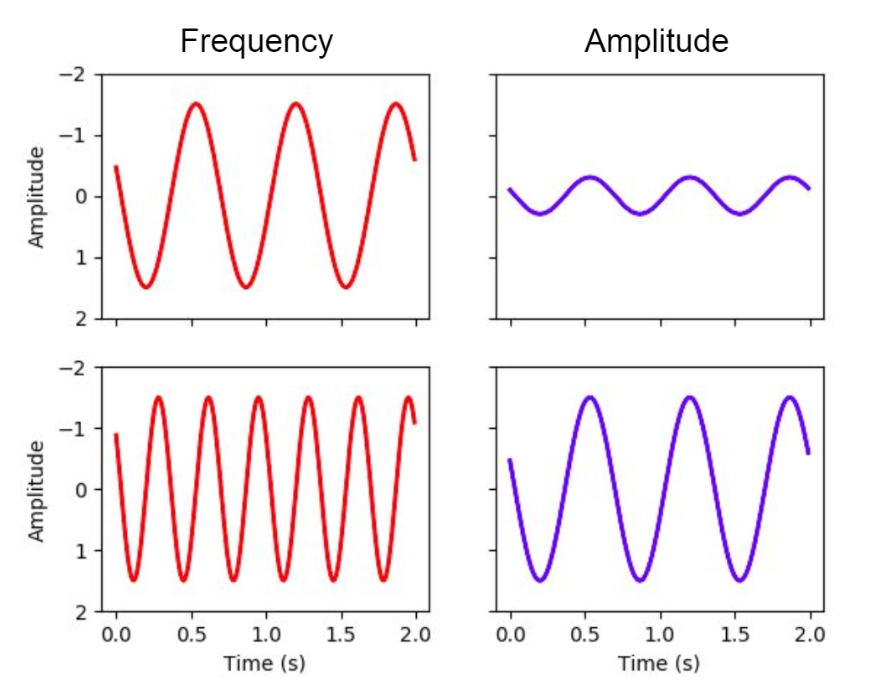


- 우선 진동 수와 음의 높낮이(pitch)의 관계
    - 진동수가 클 수록 음이 높아진다. 즉, 진동한 횟수가 많을 수록 높은 음이 구현
- 반대로 진동한 횟수가 적다면, 그만큼 음의 높이가 낮은 저음이 구현.

- frequency(진동수) <-> pitch(음높이)
 - longer periods($T$) -> lower frequency($f$) -> lower pitch
 - shorter periods($T$) -> higher frequency($f$) -> higher pitch   

- 진폭과 소리의 크기(loudness)의 관계
 - 진폭이 클 수록 소리는 크고
 - 진폭이 작을 수록 소리도 작음

- amplitude(진폭) <-> loudness(소리 크기)
 - larger amplitude($A$) -> louder
 - smaller amplitude($A$) -> quietter

## 오디오 라이브러리

* librosa는 각종 음성 처리에 유용한 라이브러리
* colab 환경에서 torchaudio는 별도 설치가 필요
* 해당 예제에서는 torchaudio를 이용해 음성 데이터를 가져옴

## 오디오 데이터 

*   pytorch의 torchaudio를 사용해 내장 데이터셋을 가져옴
*   데이터가 크기 때문에 시간이 많이 소요   

Librispeech: https://webzine.aihub.or.kr/insight/vol04/sub4.php

In [ ]:
train_dataset = torchaudio.datasets.LIBRISPEECH("./",url="train-clean-100", download= True)
test_dataset = torchaudio.datasets.LIBRISPEECH("./",url="test-clean", download= True)

  0%|          | 0.00/5.95G [00:00<?, ?B/s]

  0%|          | 0.00/331M [00:00<?, ?B/s]



*   불러온 데이터 확인
  *   첫번째 줄에서는 소리 데이터 확인 가능
  *   두번째 줄에선 해당 데이터의 sampling rate 확인 가능





(tensor([[ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]]),
 16000,
 'STUFF IT INTO YOU HIS BELLY COUNSELLED HIM',
 1089,
 134686,
 1)



*   불러온 데이터의 형상을 확인
*   데이터 길이만으로는 음성이 몇초에 해당하는지(duration)를 알 수 없음



torch.Size([1, 52400])

torch.Size([1, 106000])

## Analog Digital Conversion(ADC)
- 오디오 데이터는 연속형 데이터
- 리를 분석하기 위해서는 아날로그 소리를 디지털적인 형태로 변환하는 작업을 거쳐야 하는데 이를 Analog digital conversion(ADC)라 한다.

### Sampling 
- ADC에는 샘플링(Sampling)과 양자화(Quantization)이라는 두 가지 과정을 통해 연속적인 아날로그 소리를 이산적인 데이터로 변환     
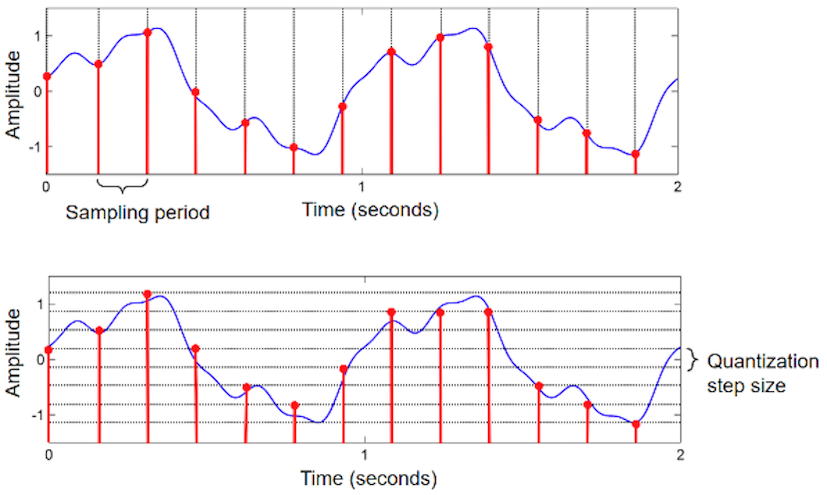
    - Sampling: 샘플링은 시간의 흐름에 따라 진행되는 연속적인 신호를 특정 주기(time intervial)에 맞추어 신호를 이산적인 시간으로 쪼개는 과정
    > - Sample rate는 초당 sample 갯수를 의미
     - Sample rate = 44100Hz인 소리의 경우 1초에 44100개의 sample을 추출 했다는 의미.
      - 사람의 가청 주파수(20Hz ~ 20KHz)의 최고 주파수인 20KHz의 2배인 40KHz에 오차 허용 범위 10% 및 영상 업계 표준과의 동기화 문제 등으로 인해 대부분의 오디오 sample rate는 44100Hz 값을 갖게 된다.

    - Quantization: 양자화는 샘플링되어 저장된 데이터를 연속적이지 않은 대표값으로 정수화하여 이산적인 값으로 변환
    > - Bit depth는 quantization을 얼마나 세밀하게 할지에 대한 정도
     - 오디오 파일의 Bit depth = 16bits 이면, 16비트(약 65536 levels)의 값으로 dicrete하게 양자화 된 소리임을 의미
     - 양자화를 마친 데이터는 인코딩을 거쳐 '0'과 '1' 이진 비트로 표현


audio_data: tensor([ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011])
sampling rate: 16000
lenght: 52400
duration(음성길이): 3.275


### Resampling

* Resampling은 sampling data의 sampling rate를 조정해 다시 sampling하는 것
* 이때 일반적으로 보간(interpolation)을 할때는 low-pass filter를 사용
* `librosa.resample`을 사용하면 편리하게 resampling 가능
* 현재 데이터는 `torch tensor`, `librosa`는 `numpy` 배열을 받아들이기 때문에 변환 필요
* sampling rate를 절반으로 줄여, 길이도 절반으로 준 것을 확인할 수 있음


In [ ]:
#16k->8k

audio_np 길이: 52400
8k로 변경 후 길이: 26200


In [ ]:
#16k->4k

audio_np 길이: 52400
4k로 변경 후 길이: 13100


### Normalization & Quantization

*   데이터간 음량이 제각각인 경우 normalization을 하여 진폭을 [-1, 1] 범위로 조정
*   여기서는 가장 간단한 방법인 데이터의 최대값으로 나눠주는 방법을 사용



원본데이터: [ 0.0010376   0.00109863  0.00091553 ... -0.0007019  -0.00097656
 -0.00109863]
정규화 후 데이터: [ 0.00285139  0.00301912  0.00251593 ... -0.00192888 -0.00268366
 -0.00301912]


원본데이터: [ 0.0010376   0.00109863  0.00091553 ... -0.0007019  -0.00097656
 -0.00109863]
양자화 후 데이터: [0 0 0 ... 0 0 0]
max_value: 128


### Mu-Law Encoding

* 사람의 귀는 작은소리의 차이는 잘잡아내는데 반해 소리가 커질수록 그 차이를 잘 느끼지 못함
* 이러한 특성을 wave값을 표현하는데 반영해 작은 값에는 높은 분별력을, 큰 값끼리는 낮은 분별력을 갖도록 함



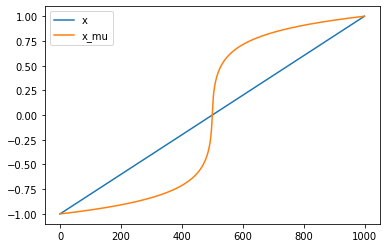

# 오디오 표현(Audio Representation)

* Sampling된 discrete한 데이터를 표현
  + 시간의 흐름에 따라, 공기의 파동의 크기로 보는 Time-Domain Representation 방법
  + 시간에 따라서 frequency의 변화를 보는 Time-Frequency Representation

## Waveform - Time-Domain Representation

* Waveform은 오디오의 자연적인 표현
* 시간이 x축으로 그리고 amplitude가 y축으로 표현

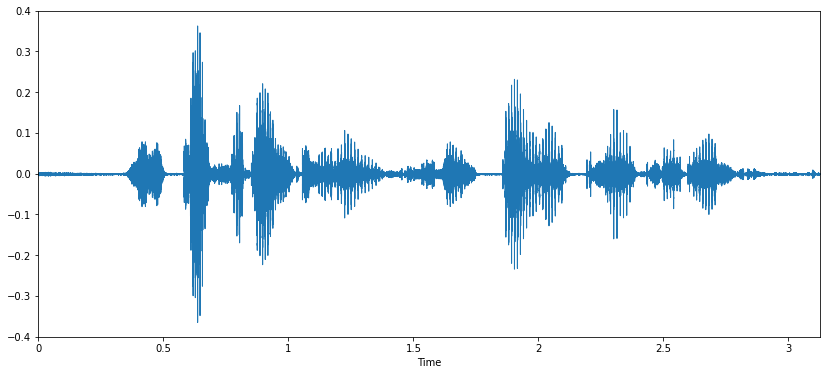

## 정현파(sinewave) - Time-Frequency Representation
- 아래 이미지는 실제 소리 파일을 파형(waveform) 형태로 시각화 한 것
-  “소리"라는 것은 각기 다른 단일 주파수를 가진 무수히 많은 정현파(sinewave)가 합산되어 형성

![](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png)

- 모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있음
- 퓨리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법

0.8999997716320983

22050

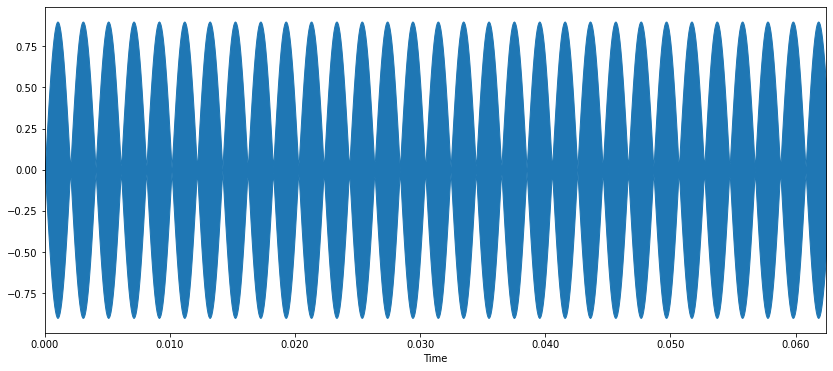

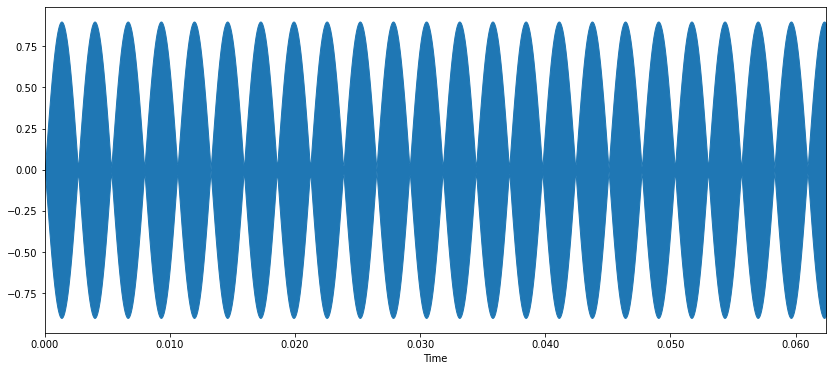

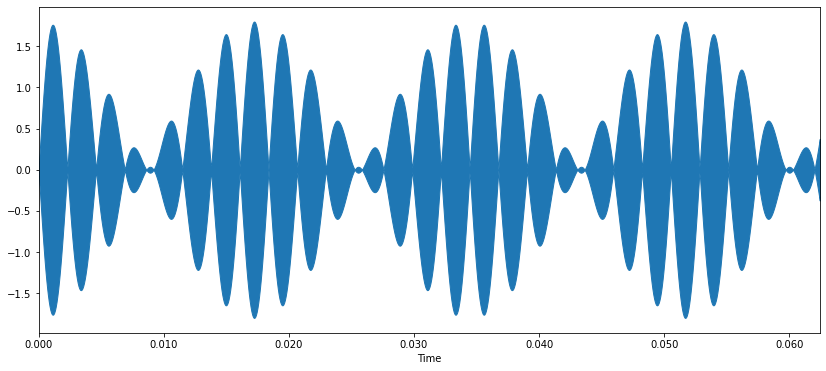

pitch class C = {..., C1, C2, C3, C4, C5, C6,...}


## 푸리에 변환(Fourier Fransform)


- 오디오 데이터는 매우 고차원이고 여러 frequency가 섞여서 발생하므로, 데이터를 그대로 사용하기 보다는 신호의 성질을 잘 반영하는 feature를 추출 해야 한다.
- 푸리에 변환은 신호를 서로 다른 frequency들의 합으로 표현해, waveform을 time domain에서 frequency domain으로 변환

![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FboqscG%2FbtqCUxBxL6A%2Fkp3sBQqU6cjwdnzeNWKXmK%2Fimg.png)
- 빨간색의 wave form은 오른쪽 보라색의 각각 4, 1.5의 Frequency를 가지는 두 주기(frequency) 함수로 분리
- 실제 audio는 훨씬 다양한 Frequency들이 섞여 있고, 푸리에 변환은 이를 각 frequency로 분해

- 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기 함수들의 합으로 분해하여 표현하는 것을 의미
- 푸리에 변환 식
$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$
$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$



* 위 식에는 주기 함수들은 포함되어 있지 않음
* 오일러 공식에 따라 다음과 같이 지수 함수와 주기 함수간 관계를 나타낼 수 있음
$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}
$$

* 해당 식을 오일러 공식에 따라 다음과 같이 표현 가능

$$
\exp \left( i\cdot 2\pi\frac{k}{T} t \right) = \cos\left({2\pi\frac{k}{T}}\right) + i\sin\left({2\pi\frac{k}{T}}\right)
$$

*   결국 푸리에 변환은 입력 신호에 상관없이 sin, cos 같은 주기 함수들의 합으로 분해 가능함을 나타냄

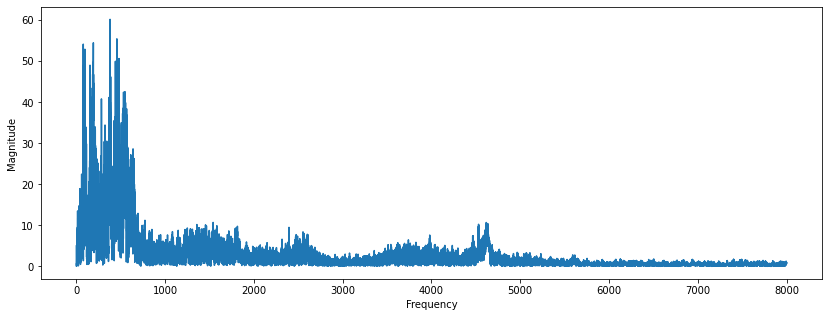

### 이산 푸리에 변환(Discrete Fourier Transform, DFT)



*   우리가 샘플링한 데이터는 discrete data라고 할 수 있음
*   위의 푸리에 변환을 이산 영역으로 생각해볼 수 있음
*   우리가 수집한 데이터 $y_n$에서 이산 시계열 데이터가 주기 N으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 N개의 사인 함수 합으로 표현 가능
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

*   위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있음 
*   이때 Spectrum $Y_{k}$는 원래의 시계열 데이터에 대한 퓨리에 변환값

$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

  * $y_{n}$ : input signal
  * $n$ : Discrete time index
  * $k$ : discrete frequency index
  * $Y_{k}$ : k번째 frequeny에 대한 Spectrum의 값



* DFT 수식을 코드로 나타내면 다음과 같음

#### 스펙트로그램(Spectrogram)

- 파형의 형태를 띄는 원본에 푸리에 변환을 적용하여 산출되는 결과물은 __스펙트럼(spectrum)__
* 스펙트로그램은 소리나 파동을 시각화하여 파악하기 위한 도구
* 파형과 스펙트럼의 특징이 조합되어 있음
* 시간 축과 주파수 축의 변화에 따라 진폭의 차이를 인쇄 농도나 표시 색상 차이로 표현



![](https://lucaseo.github.io/2020-12-26-understanding-audio-data-techniques/3.png)
- 그림은 파형에 푸리에변환 기법 중 하나인 FFT(Fast Fourier Transform)을 적용한 결과
- 스펙트럼에서 X축은 0~12000 가량의 주파수이고, Y축은 각 주파수의 진폭(amplitude) 또는 그 정도(magnitude)를 나타낸다.
- 푸리에 변환을 통해서 파형이 스펙트럼으로 표현될 때 주목해야하는 점은, 파형은 시간의 흐름에 따라 변화하는 time-domain의 성질을 띄는 반면, 스펙트럼은 각 frequency마다 그 정도가 달라지는 frequency-domain의 성질을 띈다

### Short-Time Fourier Transform(STFT)
![](https://blog.kakaocdn.net/dn/b3FgvC/btqCZyFlFp8/Do5RduBzXBZAcYxf8iRab0/img.gif)

- STFT는 전체 길이보다는 짧은 어떠한 시간 간격(window)을 설정
- 이 간격을 시간의 흐름에 따라 움직여가며(slide) 여러번의 변환을 행하여, 시간의 흐름에 따른 주파수 정보를 얻는다.
> 9초의 소리가 있다면, 1초 간격으로 쪼갠 후 1초 간격으로, 푸리에 변환을 하는 식
- STFT의 산출물은 주파수, 진폭과 더불어 시간의 정보도 포함된 스펙토그램(spectogram)
![](https://lucaseo.github.io/2020-12-26-understanding-audio-data-techniques/4.png)
- 스펙토그램 시각화에서 X축은 시간, Y축은 주파수, 그리고 주파수의 정도가 데시벨(색깔)로 표현




*   DFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모름
*   STFT는 시간의 길이를 나눠서 이제 퓨리에 변환
*   주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법이며 우리가 사용하는 signal 데이터에 적합
*   시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구함

*   STFT에 대한 식과 설명은 다음과 같음

$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$

- $N$ : FFT size
    - Window를 얼마나 많은 주파수 밴드로 나누는가

- Duration
    - 샘플링 레이트를 window로 나눈 값
    - $T= window/SR$
    - T(Window) = 5T(Signal), duration은 신호주기보다 5배 이상 길게 잡아야함
    - 440Hz 신호의 window size는 5*(1/440)

- $w(n)$ : Window function
    - 일반적으로 Hann window 사용

- $n$ : Window size
    - Window 함수에 들어가는 Sample의 양
    - 작을수록 Low-frequency resolution을 가지게 되고, high-time resolution을 가짐
    - 길수록 High-frequency, low time resolution을 가짐
    
- $H$ : Hop size
    - 윈도우가 겹치는 사이즈, 일반적으로는 1/4정도를 겹치게 함

* STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환



Spectogram :
 [[0.0179166  0.05058233 0.08892373 ... 0.07234111 0.05904794 0.17495634]
 [0.04092977 0.06787419 0.03597843 ... 0.25867903 0.2902206  0.12034403]
 [0.0966483  0.06926568 0.05243768 ... 0.51630545 0.5421254  0.37601838]
 ...
 [0.00324974 0.0044488  0.00577083 ... 0.00595835 0.00598241 0.0058337 ]
 [0.0062498  0.00628622 0.00665502 ... 0.006212   0.00736727 0.00432309]
 [0.01173328 0.01300005 0.01318454 ... 0.01172602 0.01186005 0.00950052]]


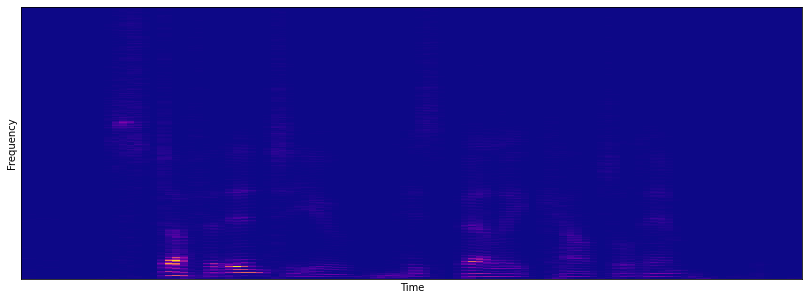

STFT를 적용하여 구한 spectogram을 아래와 같이 시각화. x축은 시간, y축은 주파수, 그리고 주파수의 정도를 색깔로 확인할 수 있음. 그런데 값이 너무 미세해서 차이를 파악하고 관찰하기 적합하지 않음.

### Log-spectogram
- 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구하여 분석
- 시각적인 이유뿐만 아니라, 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이

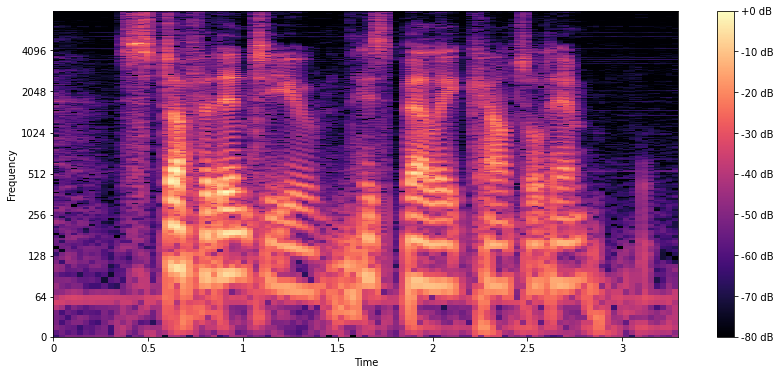

#### 윈도우 함수(Window Function)
- Windowing: 오디오는 sequential하고, time dependent하다. 따라서 Time invariant(stationary) 가정이 가능해지는 아주 짧은 구간으로 신호를 쪼갠다.
- 이렇게 잘린 구간 내에서 신호는 stationary 가정을 만족해 시간에 영향을 받지 않게 된다. 음성인식 task에서는 각 구간이 하나의 phone을 가지게 잘라준다. 보통 25ms 정도를 한 구간 길이로 잡는다.
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpJYia%2FbtqC85RzqtT%2FZq6JZdOHuKRgUZHPSouRG0%2Fimg.png)

- 경계(양 끝값)가 불연속해져 뚝뚝 끊기게 되어 실제 신호와 달라지는 문제가 생김.
- windowing이 신호 특성에 주는 영향을 최소화 하기 위해 양 경계값을 0으로 수렴시키는 window function을 각 구간(frame)마다 곱한다.
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcYKw9S%2FbtqC9x77dPe%2FtNxoIerPSSpuBu1ftWjzHk%2Fimg.png)

Framed audio shape:(119, 1024)


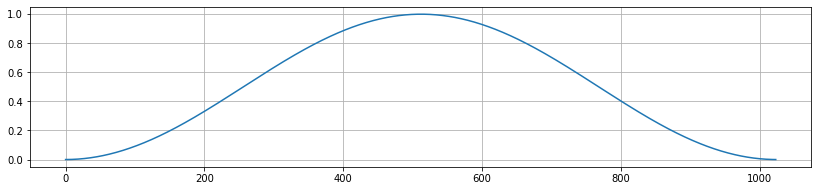

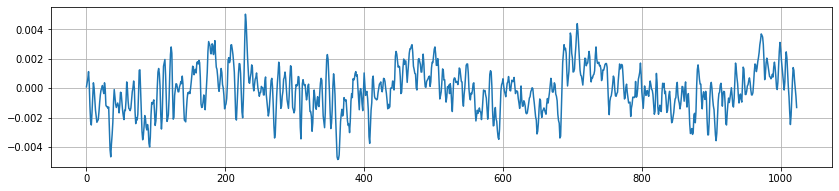

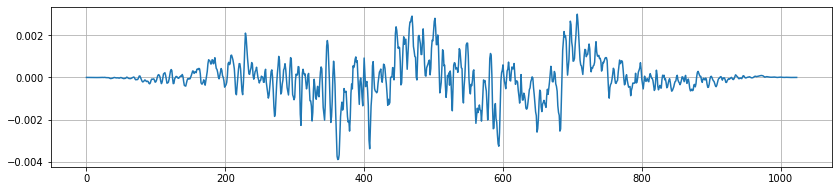

#### 윈도우 크기(Window Size)




*   window size는 time과 frequency의 resolutions를 제어
  * short-window - 낮은 frequency resolutuon, 높은 time resolution
  * long-window - 높은 frequency resolution, 낮은 time resolution



## Mel Frequency Cepstral Coefficient (MFCC)

### 멜 스케일(Mel Scale)

- 사람의 달팽이관은 저주파 대역을 감지하는 구간이 조밀하고, 고주파 대역을 감지하는 구간은 넓게 이루어져 있음. 
- 따라서 저주파 대역에 의미 있는 정보가 집중되어 있으며, 인간의 청각은 저주파 대역에서 더 민감하게 반응을 한다는 점을 반영하여, 주파수의 대역에 차등적으로 중요도를 적용하는 Mel-scale이 제안



*   주파수 단위를 다음 공식에 따라 멜 스케일로 변환
$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$
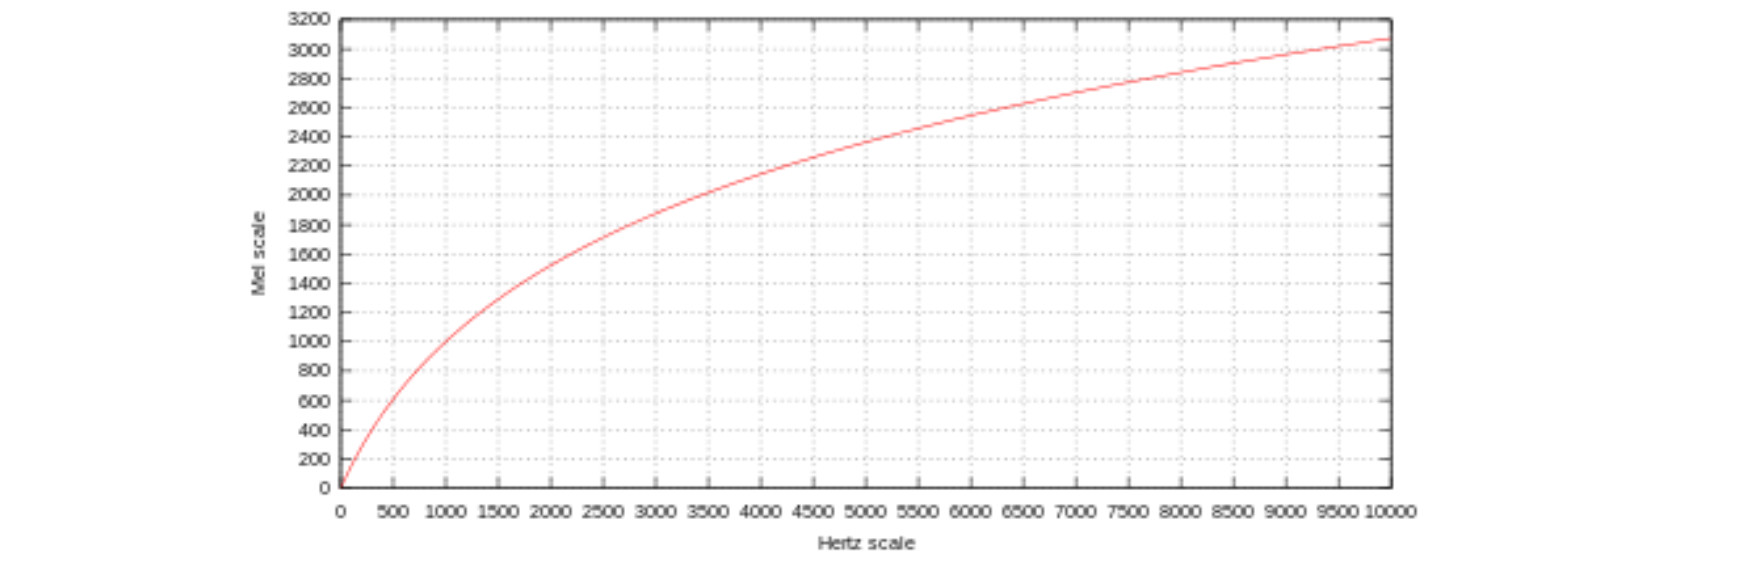
*   일반적으로 mel-scaled bin을 FFT size보다 조금 더 작게 만듬
*   해당 scale을 적용해 spectogram을 만든 것이 melspectogram


### MFCC 구하기
![image.png](https://i.imgur.com/Pn5LGTk.png#center)
- 주어진 신호(오디오 데이터)를 일정한 간격(window)로 나누어 푸리에변환을 적용하여 스펙토그램을 구한다.
- 스펙토그램의 제곱(파워 스펙토그램)에 Mel-scale을 기반으로 필터뱅크(Filter banks)를 구성하고 필터뱅크에 로그 변환을 수행한다. 이렇게 하면 Mel-scale에 따라 나누어진 구간 별로 분포한 정보를 확보한다.
- 주어진 Log Mel-spectogram에 역푸리에 변환을 적용하여 Cepstrum을 구한다.
- MFCC는 이렇게 구한 결과의 진폭(amplitude)이다.

MFCCs Shape:  (13, 103)
MFCCs: 
 [[-460.9648    -458.6473    -466.89505   ... -605.7854    -605.36865
  -608.08124  ]
 [  76.90151     84.925186    88.29576   ...   75.29614     75.19664
    72.89904  ]
 [ -40.293793   -39.421867   -33.598553  ...   34.483635    33.85875
    35.956787 ]
 ...
 [  -2.0867405    1.7403551    4.7782974 ...   12.761737    10.221829
    12.524871 ]
 [   6.8356934    6.9281588   10.908878  ...   10.559328     9.512545
    13.128197 ]
 [  -2.0519896   -4.4897385   -7.276254  ...    4.081686     4.3878603
     6.443626 ]]


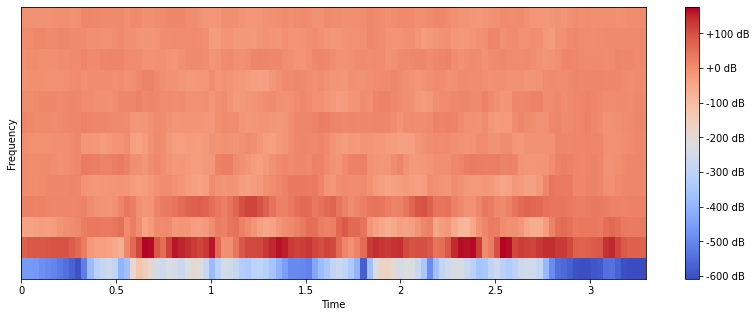